# **Limpieza de datos**

### **1. Una primera mirada al dataset**

In [24]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cargar_tablas as ct

In [12]:
pd.options.display.max_columns
pd.set_option('display.max_columns', None)


In [15]:
df =ct.payment_df

In [16]:
print(df.shape)
df.head(2)

(14596, 6)


,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   payment_id    14596 non-null  int64         
 1   customer_id   14596 non-null  int64         
 2   staff_id      14596 non-null  int64         
 3   rental_id     14596 non-null  int64         
 4   amount        14596 non-null  float64       
 5   payment_date  14596 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 684.3 KB


### **2. Limpieza**<br>
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

#### **2.1 Datos faltantes**<br>
Acá comenzamos a ver que los datos no están completos, en este caso el dataset extraido no posee datos nulos.

In [18]:
nulos=df.isnull().sum()
nulos

payment_id      0
customer_id     0
staff_id        0
rental_id       0
amount          0
payment_date    0
dtype: int64

#### **2.2 Errores tipográficos en variables categóricas**

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.Se deben unificar estos sub-niveles. Eliminar espacios o parentesis del nombre de las columnas. Tambien borrar datos que no hagan parte de la descripción del dataset original.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14596 entries, 0 to 14595
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   payment_id    14596 non-null  int64         
 1   customer_id   14596 non-null  int64         
 2   staff_id      14596 non-null  int64         
 3   rental_id     14596 non-null  int64         
 4   amount        14596 non-null  float64       
 5   payment_date  14596 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 798.2 KB


In [23]:
df = df.apply(lambda x: x.astype(str).str.lower())#en este caso no hay columnas categoricas

#### **2.3 Filas repetidas**

In [19]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (14596, 6)
Tamaño del set después de eliminar las filas repetidas: (14596, 6)


#### **2.4 *Outliers* en las variables numéricas**

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.<br>
Creemos gráficas tipo "boxplot" de las columnas numéricas:

In [21]:
df.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996577


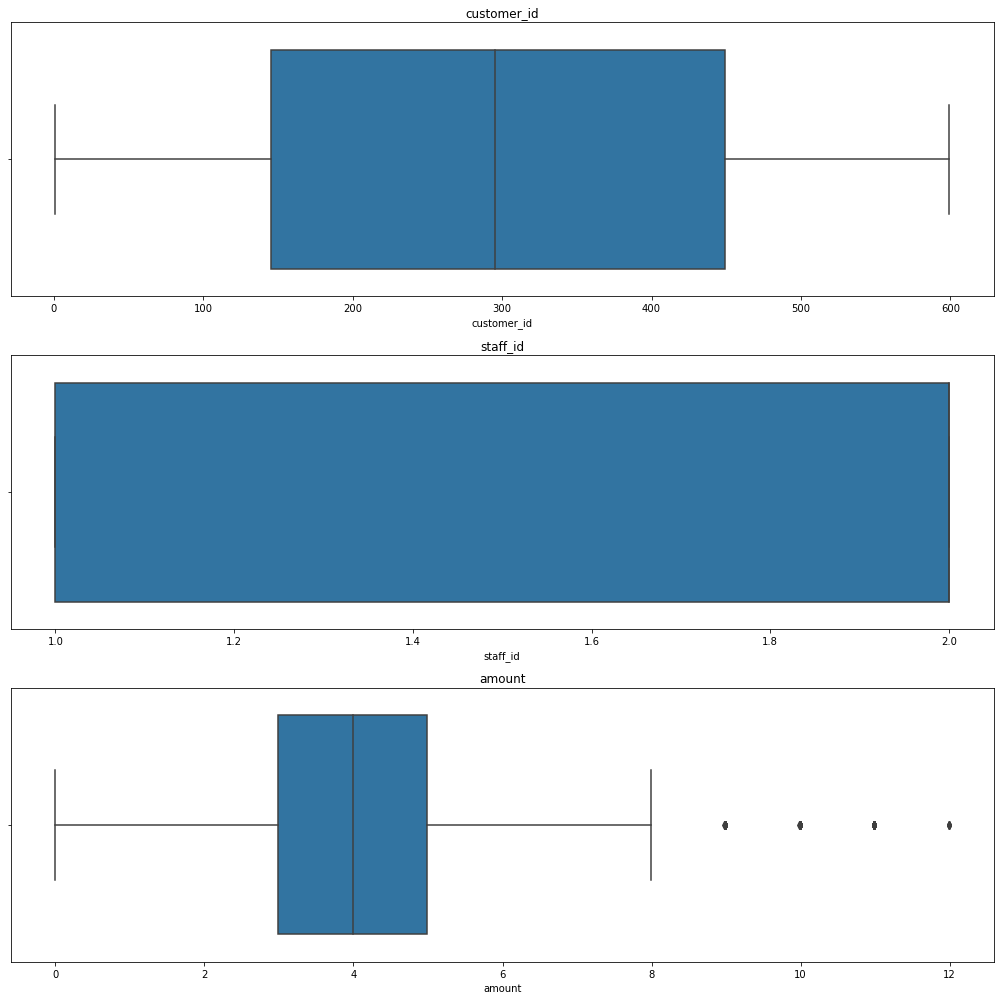

In [22]:
# Crear el boxplot
plt.figure(figsize=(14, 14))  # Ajusta el tamaño de la gráfica

# Boxplot para la Columna1
plt.subplot(3, 1, 1)
sns.boxplot(x="customer_id", data=df)
plt.title("customer_id")

# Boxplot para la Columna2
plt.subplot(3, 1, 2)
sns.boxplot(x="staff_id", data=df)
plt.title("staff_id")

# Boxplot para la Columna3
plt.subplot(3, 1, 3)
sns.boxplot(x="amount", data=df)
plt.title("amount")


# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

No se observan outliers en la muestra o anormalidades en la muestra

### **Generación del dataset limpio**

In [34]:
#Generar archivos csv con los datos limpios
df.to_csv("cleaned_data.csv")